In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # express is another package of plotly
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_column',30)

In [2]:
df = pd.read_csv("us_perm_visas.csv")
df

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,...,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,NaN,ARMENIA,2012-02-01,24 WEST 25 STREET,5TH FLOOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,NaN,POLAND,2011-12-21,200 BROAD STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,NaN,INDIA,2011-12-01,1054 TECHNOLOGY PARK DRIVE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,NaN,SOUTH KOREA,2011-12-01,33-17 PRINCE ST. 2ND FL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,NaN,CANADA,2012-01-26,1373 BROADWAY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,SOUTH KOREA,NaN,2016-12-30,434 S EUCLID STREET STE 100,NaN,...,N,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,VIETNAM,NaN,2016-12-30,ONE MICROSOFT WAY,NaN,...,Y,2016-07-27,2016-07-27,Y,NaN,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,INDIA,NaN,2016-12-30,220 W MICHIGAN AVE,NaN,...,N,2016-07-21,2016-07-28,Y,NaN,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,SOUTH KOREA,NaN,2016-12-30,3957 E. Camelback Rd,NaN,...,N,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN


In [3]:
df.shape

(374362, 154)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Columns: 154 entries, add_these_pw_job_title_9089 to wage_offered_unit_of_pay_9089
dtypes: float64(10), object(144)
memory usage: 439.8+ MB


In [6]:
df.describe()
# display it contineous columns

,employer_num_employees,employer_yr_estab,foreign_worker_yr_rel_edu_completed,fw_info_yr_rel_edu_completed,job_info_alt_cmb_ed_oth_yrs,job_info_alt_occ_num_months,job_info_experience_num_months,job_info_training_num_months,wage_offered_from_9089,wage_offered_to_9089
count,2.390130e+05,238958.000000,83364.000000,137198.000000,70220.000000,147200.000000,133188.000000,4779.000000,1.146470e+05,3.101500e+04
mean,2.309387e+04,1984.208267,2001.345761,2002.633603,4.593876,36.483118,33.103560,32.685081,9.588846e+04,1.232273e+05
std,5.453129e+05,38.470555,91.444715,89.674423,4.838582,23.391668,22.733393,20.593288,1.463822e+05,1.080289e+05
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.700000e+00,0.000000e+00
25%,7.300000e+01,1980.000000,2003.000000,2004.000000,3.000000,24.000000,12.000000,12.000000,7.453400e+04,9.700100e+04
50%,1.200000e+03,1996.000000,2006.000000,2007.000000,5.000000,24.000000,24.000000,36.000000,9.064400e+04,1.206000e+05
75%,1.613400e+04,2004.000000,2010.000000,2011.000000,5.000000,60.000000,60.000000,36.000000,1.100000e+05,1.448419e+05
max,2.635506e+08,2016.000000,2103.000000,2207.000000,96.000000,240.000000,244.000000,240.000000,1.629060e+07,1.328500e+07


In [7]:

df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [11]:
df.columns.values

array(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       'country_of_citizenship', 'country_of_citzenship', 'decision_date',
       'employer_address_1', 'employer_address_2', 'employer_city',
       'employer_country', 'employer_decl_info_title', 'employer_name',
       'employer_num_employees', 'employer_phone', 'employer_phone_ext',
       'employer_postal_code', 'employer_state', 'employer_yr_estab',
       'foreign_worker_info_alt_edu_experience',
       'foreign_worker_info_birth_country', 'foreign_worker_info_city',
       'foreign_worker_info_education',
       'foreign_worker_info_education_other', 'foreign_worker_info_inst',
       'foreign_worker_info_major', 'foreign_worker_info_postal_code',
       'foreign_worker_info_rel_occup_exp',
       'foreign_worker_info_req_experience', 'foreign_worker_info_state',
       'forei

In [8]:
df['case_number']

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
374357    A-16363-85407
374358    A-16271-56745
374359    A-16354-82345
374360    A-16357-84250
374361    A-16279-59292
Name: case_number, Length: 374362, dtype: object

In [9]:
df['case_no']

0         A-07323-97014
1         A-07332-99439
2         A-07333-99643
3         A-07339-01930
4         A-07345-03565
              ...      
374357              NaN
374358              NaN
374359              NaN
374360              NaN
374361              NaN
Name: case_no, Length: 374362, dtype: object

In [14]:
# remove duplicate columns

In [10]:
df.drop('case_no',axis=1,inplace=True)

In [11]:
df.columns.values

array(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       'country_of_citizenship', 'country_of_citzenship', 'decision_date',
       'employer_address_1', 'employer_address_2', 'employer_city',
       'employer_country', 'employer_decl_info_title', 'employer_name',
       'employer_num_employees', 'employer_phone', 'employer_phone_ext',
       'employer_postal_code', 'employer_state', 'employer_yr_estab',
       'foreign_worker_info_alt_edu_experience',
       'foreign_worker_info_birth_country', 'foreign_worker_info_city',
       'foreign_worker_info_education',
       'foreign_worker_info_education_other', 'foreign_worker_info_inst',
       'foreign_worker_info_major', 'foreign_worker_info_postal_code',
       'foreign_worker_info_rel_occup_exp',
       'foreign_worker_info_req_experience', 'foreign_worker_info_state',
       'foreign_worker_i

In [12]:
df.case_status

0         Certified
1            Denied
2         Certified
3         Certified
4         Certified
            ...    
374357    Withdrawn
374358    Withdrawn
374359    Withdrawn
374360    Withdrawn
374361    Withdrawn
Name: case_status, Length: 374362, dtype: object

In [20]:
df['case_status'].value_counts(normalize=True)

case_status
Certified            0.485981
Certified-Expired    0.396905
Denied               0.068514
Withdrawn            0.048600
Name: proportion, dtype: float64

<Axes: ylabel='count'>

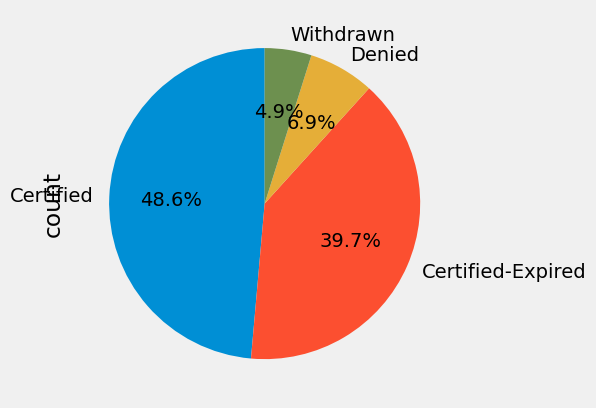

In [19]:
df['case_status'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90)

In [36]:
# withdrawn application does not make sense to analyze
df = df[df['case_status']!= 'Withdrawn']

# how we can rename certified and certified-expired

In [38]:
 df['case_status'] = df['case_status'].replace(to_replace='Certified-Expired',value = 'Certified')

In [39]:
df['case_status'].unique()

array(['Certified', 'Denied'], dtype=object)

In [33]:
# we can use map , replace or 
# df.loc[df.case_status =='Certified-Expired','case_status'] ='Certified'

Series([], Name: case_status, dtype: bool)

In [34]:
df['case_status']

0         Certified
1            Denied
2         Certified
3         Certified
4         Certified
            ...    
374357    Withdrawn
374358    Withdrawn
374359    Withdrawn
374360    Withdrawn
374361    Withdrawn
Name: case_status, Length: 374362, dtype: object

In [41]:
df.case_status.value_counts()

case_status
Certified    330519
Denied        25649
Name: count, dtype: int64

In [42]:
df.case_status.value_counts(normalize=True)

case_status
Certified    0.927986
Denied       0.072014
Name: proportion, dtype: float64

In [43]:
# insights--> only 7% people denied

# all row and columns have null value how we can drop all

In [45]:
df.shape

(356168, 153)

In [48]:
df.dropna(axis=1,how='all',inplace = True)
df.dropna(axis=0,how ='all',inplace = True)

In [49]:
df.shape

(356168, 153)

In [50]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_number', 'case_received_date',
       'case_status', 'class_of_admission', 'country_of_citizenship',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=153)

In [51]:
df['application_type']

0         PERM
1         PERM
2         PERM
3         PERM
4         PERM
          ... 
374349     NaN
374350     NaN
374351     NaN
374352     NaN
374353     NaN
Name: application_type, Length: 356168, dtype: object

<Axes: xlabel='application_type'>

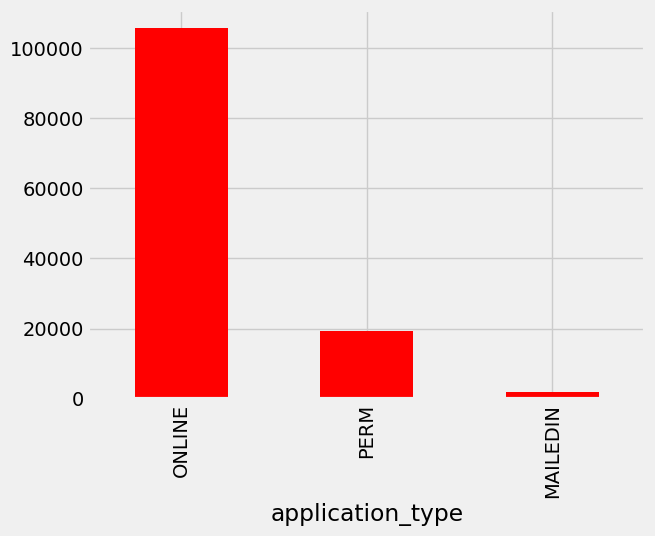

In [53]:
df['application_type'].value_counts().plot(kind='bar',color='red')

<Axes: xlabel='application_type', ylabel='count'>

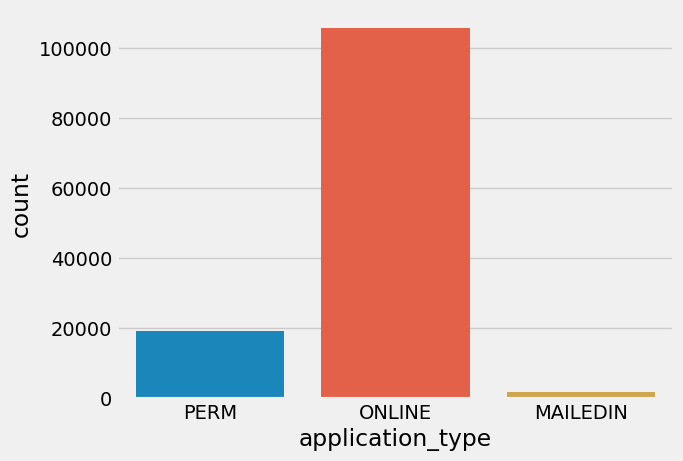

In [56]:
sns.countplot(data=df,x = 'application_type')

In [57]:
df.us_economic_sector

0                            IT
1         Other Economic Sector
2                     Aerospace
3         Other Economic Sector
4                  Advanced Mfg
                  ...          
374349                      NaN
374350                      NaN
374351                      NaN
374352                      NaN
374353                      NaN
Name: us_economic_sector, Length: 356168, dtype: object

In [58]:
df.us_economic_sector.unique()

array(['IT', 'Other Economic Sector', 'Aerospace', 'Advanced Mfg',
       'Educational Services', 'Retail', 'Construction', 'Hospitality',
       'Automotive', nan, 'Health Care', 'Agribusiness', 'Finance',
       'Energy', 'Transportation', 'Homeland Security', 'Biotechnology',
       'Geospatial'], dtype=object)

In [61]:
df['us_economic_sector'].value_counts(normalize=True)

us_economic_sector
IT                       0.407974
Advanced Mfg             0.145622
Other Economic Sector    0.121306
Finance                  0.071864
Educational Services     0.070829
Health Care              0.053008
Retail                   0.034815
Aerospace                0.032407
Hospitality              0.014619
Construction             0.010880
Automotive               0.008968
Energy                   0.008447
Transportation           0.007388
Agribusiness             0.006486
Biotechnology            0.003607
Geospatial               0.001133
Homeland Security        0.000645
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

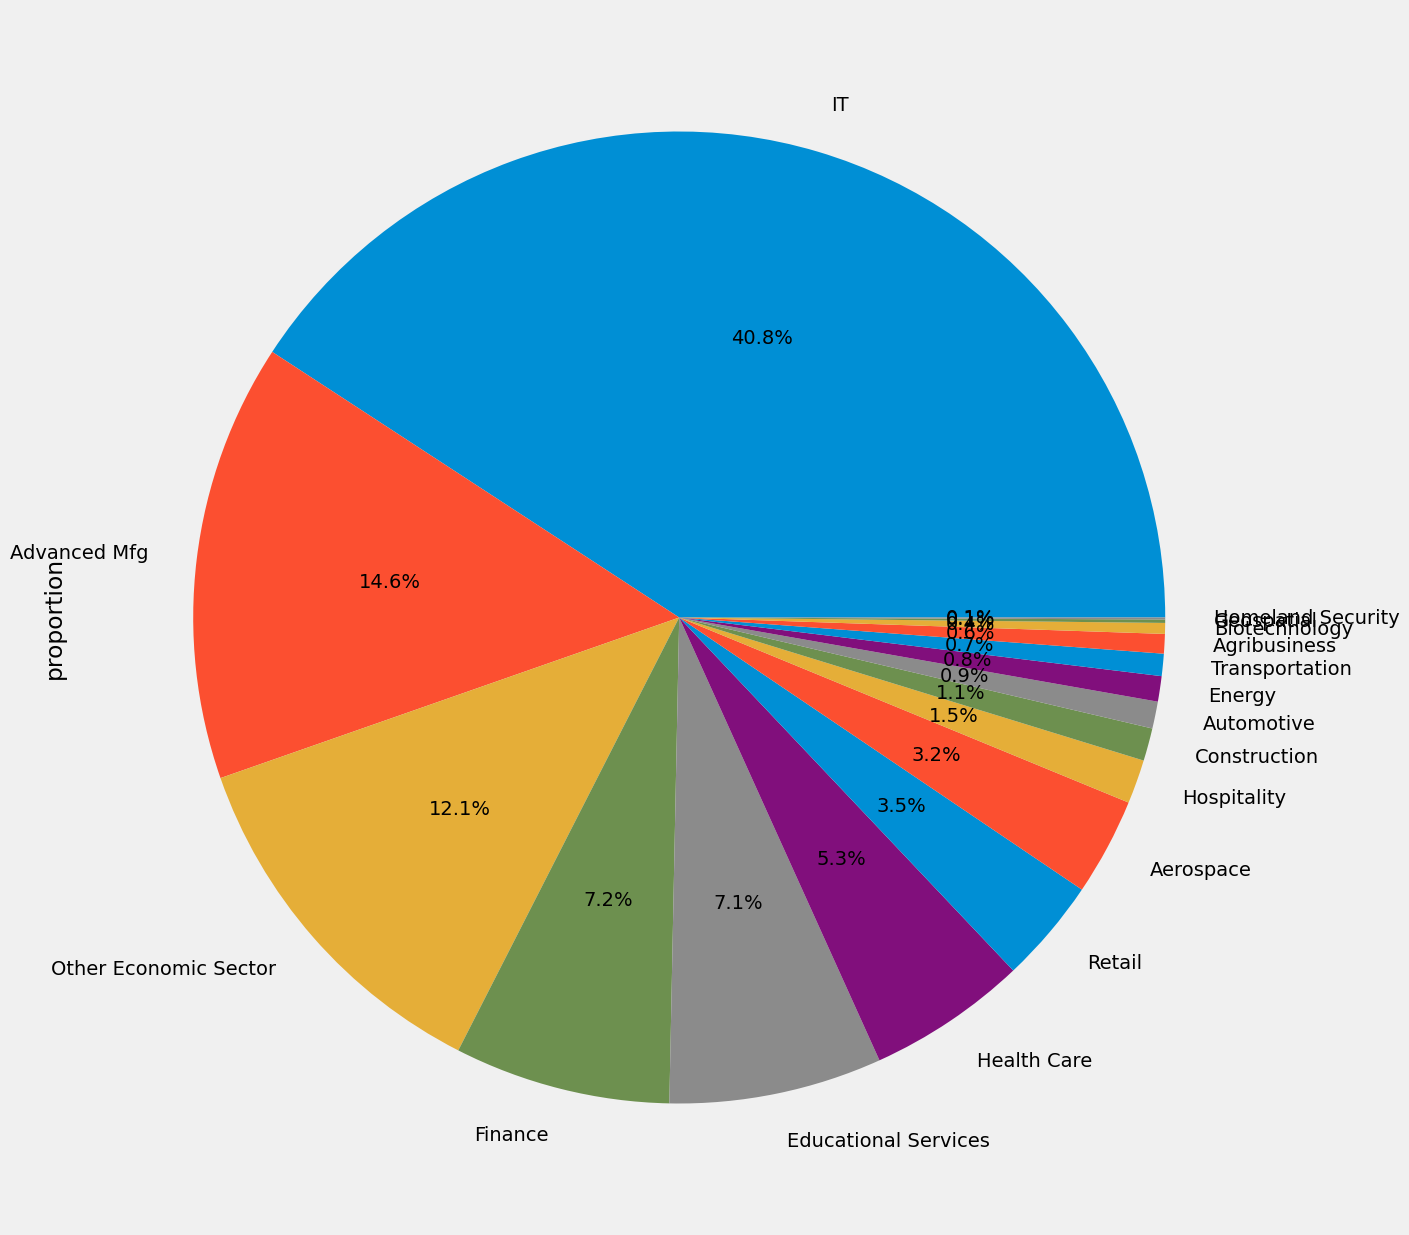

In [67]:
# make pie chart
df['us_economic_sector'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',figsize=(20,15))

In [74]:
# insights for above you will get US Visa IT

In [77]:
df['decision_date'] = pd.to_datetime(df['decision_date'])
df['year'] = df['decision_date'].dt.year

In [78]:
df['year']

0         2012
1         2011
2         2011
3         2011
4         2012
          ... 
374349    2016
374350    2016
374351    2016
374352    2016
374353    2016
Name: year, Length: 356168, dtype: int32

In [79]:
df['year'].value_counts()

year
2016    119920
2015     92338
2014     73881
2013     37473
2012     21954
2011     10602
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='count'>

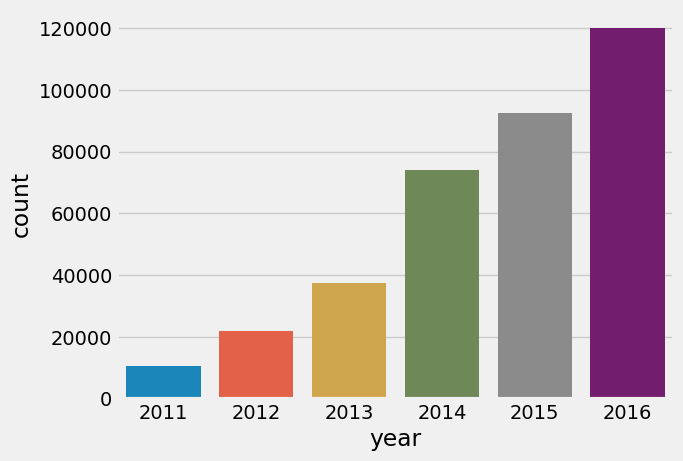

In [80]:
sns.countplot(data=df,x = 'year')

# insights for above 
1. total number of visa application <20000
2. number of visa application increasing every year
3. in 2016 highest visa appliction

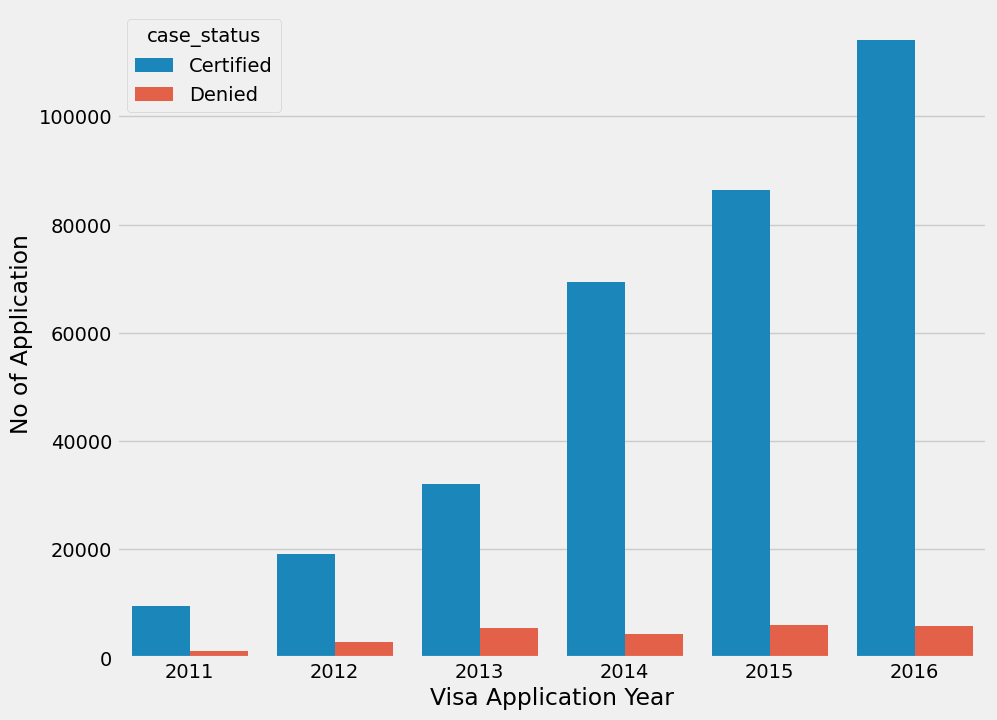

In [82]:
fig,ax = plt.subplots(figsize=(10,8))

sns.countplot(x = 'year',hue='case_status',data=df)
ax.set(xlabel='Visa Application Year',ylabel='No of Application')
plt.show()

# insights for above plot
1. Number of US Visa applicatiaon increasing every year
2. Denied and accepted application also increasing every year
3. highest approved visa application in 2016

# top 10 city 

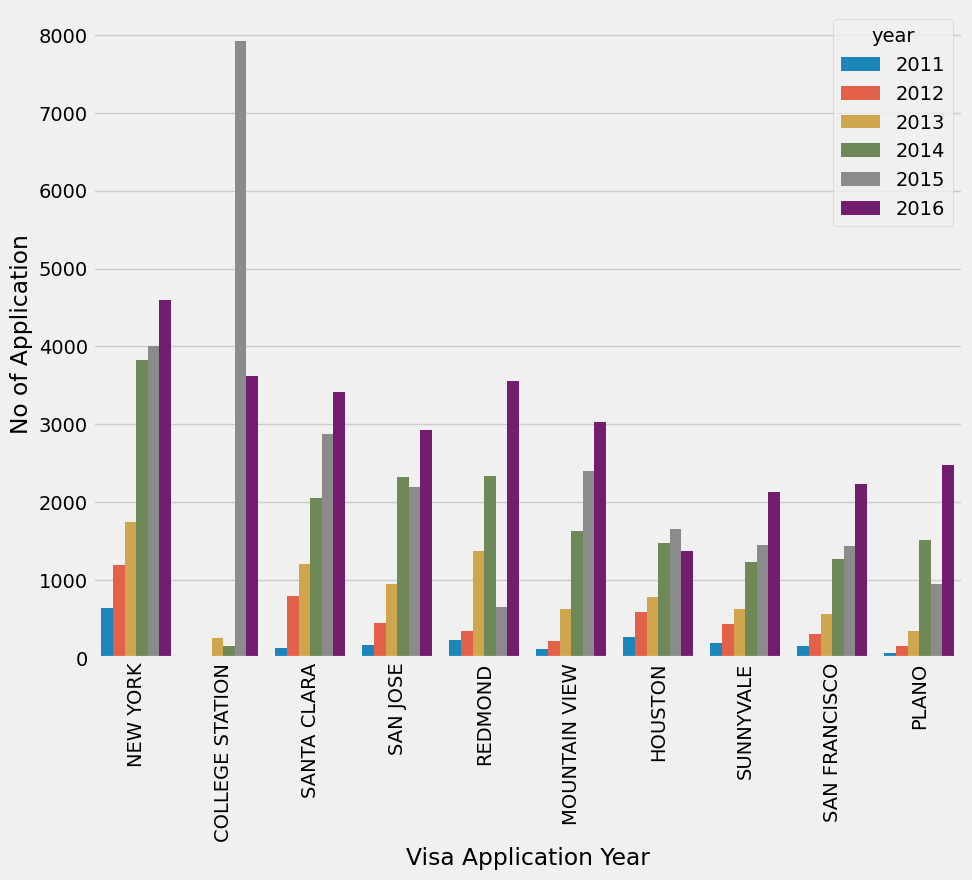

In [95]:
fig,ax = plt.subplots(figsize=(10,8))

sns.countplot(x = 'employer_city',hue='year',data=df,order = df.employer_city.value_counts().iloc[:10].index)
ax.set(xlabel='Visa Application Year',ylabel='No of Application')
plt.xticks(rotation=90) # rotate name or text
plt.show()